## Section for PLUTO Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from xgboost import plot_importance


### Column Name                                          Description
***
1.Address:	       An address for the tax lot.(STRING)<br>
2.BldgArea:        The total gross area in square feet.(NUMERIC)<br>
3.BldgDepth:       The building’s depth, which is the effective perpendicular distance, measured in feet.(NUMERIC)<br>
4.BuiltFAR:        Total building floor area divided by the area of the tax lot.(NUMERIC)<br>
5.CommFAR:         The Maximum Allowable Commercial Floor Area Ratio(NUMERIC)<br>
6.FacilFAR:        The Maximum Allowable Community Facility Floor Area Ratio(NUMERIC).<br>
7.Lot:             The number of the tax lot.(DISCRETE)<br>
8.LotArea:         Total area of the tax lot, expressed in square feet rounded to the nearest integer.(NUMERIC)<br>
9.LotDepth:        The tax lot's depth measured in feet.(NUMERIC)<br>
10.NumBldgs:       The number of buildings on the tax lot.(NUMERIC)<br>
11.NumFloors:      In the tallest building on the tax lot, the number of full and partial stories starting from the ground floor.(NUMERIC)<br>
12.OfficeArea:    An estimate of the exterior dimensions of the portion of the structure(s) allocated for office use.(NUMERIC)<br>
13.ResArea:       An estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use.(NUMERIC)<br>
14.ResidFAR:      The Maximum Allowable Residential Floor Area Ratio.(NUMERIC)<br>
15.RetailArea:    An estimate of the exterior dimensions of the portion of the structure(s) allocated for retail use.(NUMERIC)<br>
16.YearBuilt:    The year construction of the building was completed.(DISCRETE)<br>
17.YearAlter1:   If a building has been altered more than once, YEAR ALTERED 1 is the year of the second most recent alteration.(DISCRETE)<br>
18.ZipCode:    The zip code that the tax lot is located in.(NUMERIC)<br>
19.YCoord:     The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot.(NUMERIC)<br>
20.XCoord:     The X coordinate of the XY coordinate pair which depicts the approximate location of the lot.(NUMERIC)<br>

## Explore Bronx Dataset

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_******************* = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='************************',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_***************.get_object(Bucket='*********',Key='**********')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df2 = pd.read_csv(body)


In [3]:
df2.shape
#89854 rows, 87 columns

(89854, 87)

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89854 entries, 0 to 89853
Data columns (total 87 columns):
Borough                 89854 non-null object
Block                   89854 non-null int64
Lot                     89854 non-null int64
CD                      89854 non-null int64
CT2010                  89447 non-null float64
CB2010                  87342 non-null float64
SchoolDist              89695 non-null float64
Council                 89649 non-null float64
ZipCode                 89525 non-null float64
FireComp                89568 non-null object
PolicePrct              89692 non-null float64
HealthCenterDistrict    89727 non-null float64
HealthArea              89630 non-null float64
SanitBoro               89235 non-null float64
SanitDistrict           89238 non-null float64
SanitSub                88789 non-null object
Address                 89785 non-null object
ZoneDist1               89795 non-null object
ZoneDist2               2553 non-null object
ZoneDist3  

In [5]:
df2.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BRONX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BRONX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BRONX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BRONX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BRONX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


In [6]:
df2.tail()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
89849,BRONX,9999,100,204,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,200 000,2.0,NaN,NaN,NaN,3,NaN,NaN,18V1
89850,BRONX,9999,150,205,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,200 000,2.0,NaN,NaN,NaN,3,NaN,NaN,18V1
89851,BRONX,9999,200,205,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,200 000,2.0,NaN,NaN,NaN,3,NaN,NaN,18V1
89852,BRONX,9999,8900,209,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,200 000,2.0,NaN,NaN,NaN,3,NaN,NaN,18V1
89853,BRONX,0,8900,208,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,18V1


In [7]:
#Select the columns we want
df2 = df2[['Address','BldgArea','BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 
              'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 
              'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]

In [8]:
df2.shape

(89854, 20)

In [9]:
df2.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89854 entries, 0 to 89853
Data columns (total 20 columns):
Address       89785 non-null object
BldgArea      89854 non-null int64
BldgDepth     89854 non-null float64
BuiltFAR      89854 non-null float64
CommFAR       89854 non-null float64
FacilFAR      89854 non-null float64
Lot           89854 non-null int64
LotArea       89854 non-null int64
LotDepth      89854 non-null float64
NumBldgs      89854 non-null int64
NumFloors     89854 non-null float64
OfficeArea    89854 non-null int64
ResArea       89854 non-null int64
ResidFAR      89854 non-null float64
RetailArea    89854 non-null int64
YearBuilt     89854 non-null int64
YearAlter1    89854 non-null int64
ZipCode       89525 non-null float64
YCoord        86595 non-null float64
XCoord        86595 non-null float64
dtypes: float64(10), int64(9), object(1)
memory usage: 13.7+ MB


In [11]:
df2['Address'].value_counts(sort=False)

5791 BROADWAY                1
4204 NAPIER AVENUE           1
2226 EASTCHESTER ROAD        1
1153 VINCENT AVENUE          1
1889 O'BRIEN AVENUE          1
4430 BAYCHESTER AVENUE       1
1401 PELHAM PARKWAY NORTH    1
2519 CRESTON AVENUE          1
711 EAST 233 STREET          1
748 EAST 218 STREET          1
255 KEARNEY AVENUE           1
3904 DYRE AVENUE             1
1152 RHINELANDER AVENUE      1
1815 NEREID AVENUE           1
2004 MAYFLOWER AVENUE        1
1367 HOLLYWOOD AVENUE        1
1226 BRYANT AVENUE           1
292 WEST 234 STREET          1
1608 KENNELWORTH PLACE       1
1153 GRENADA PLACE           1
2588 CRESTON AVENUE          1
760 SOUNDVIEW AVENUE         1
3415 KNOX PLACE              1
626 WEST 256 STREET          1
2238 VALENTINE AVENUE        1
5420 SYLVAN AVENUE           1
4755 RICHARDSON AVENUE       1
2220 NORTON AVENUE           1
4812 MURDOCK AVENUE          1
4450 DE REIMER AVENUE        1
                            ..
810 RIVER AVENUE             1
2907 ELY

In [12]:
df2['BldgArea'].value_counts(sort=False)
#A TOTAL BUILDING FLOOR AREA of zero can mean it is either not available or not applicable. If NUMBER OF BUILDINGS is greater than zero, then a TOTAL BUILDING FLOOR AREA of zero means it is not available. 
#If NUMBER OF BUILDINGS is zero, then a TOTAL BUILDING FLOOR AREA of zero means it is not applicable.

0         6423
2049        11
4098         2
6147         1
53274        1
2113         6
8260         2
28750        2
47191        1
128          1
2177         8
4226         4
6275         1
57500        7
192          1
2241        13
4290         5
12486        1
14535        1
20682        1
24780        2
30927        1
32976        1
86250        1
256          1
2305        10
8452         1
12550        2
43285        1
115000       2
          ... 
16056        1
3774         5
1727        13
98000        4
26355        1
16120        3
5885         1
3838         1
1791        21
73500        3
32560        1
12090        2
10043        1
3902         1
1855        10
49000        9
8060         3
1919         7
34735        1
24500       11
4030         5
1983         5
876500       1
81880        1
73692        1
30705        1
8188         5
6141         1
4094         1
2047         8
Name: BldgArea, Length: 11474, dtype: int64

In [13]:
df2['BldgDepth'].value_counts(sort=False)
#Building Depth cannot be zero

0.00      6687
32.00     2769
64.00      461
128.00      15
6.00         3
2.00         1
8.00         5
40.32        2
142.17       1
48.64        1
126.08       1
78.42        1
57.28        1
192.33       1
29.83        3
249.00       1
56.75        5
46.08        8
62.42        5
29.67       10
107.52       1
45.99        1
98.17        2
42.65        2
58.60        3
60.42        3
36.10        1
128.25       1
121.00      23
35.25        5
          ... 
638.00       1
109.58       1
319.00       2
39.00     1041
57.50       20
244.00       3
53.26        4
78.53        1
152.50       1
65.83        4
97.67        3
25.33        2
149.00       2
100.68       1
112.33       1
31.66        1
118.58       1
94.56        1
35.50       79
116.67       1
28.84        1
138.50       1
123.08       1
28.70        1
31.58        2
540.00       3
131.50       1
31.65        1
31.60        2
127.58       1
Name: BldgDepth, Length: 2176, dtype: int64

In [14]:
df2['BuiltFAR'].value_counts(sort=False)
#BuiltFAR cannot be zero

0.00     6521
2.00      244
0.50      650
0.25      232
1.01      699
0.19      157
0.61      712
1.04      570
4.76       19
0.42      425
5.43       10
4.32       33
0.11       90
5.39        6
1.13      403
4.65       23
1.76       80
4.30       34
1.52      167
8.96        1
6.07        3
6.18        3
4.62       21
0.44      485
1.72       68
0.22      191
3.04       14
2.30       31
0.26      277
0.60      829
         ... 
5.65        4
5.70        4
3.48       52
0.02       49
0.34      342
3.64       24
6.79        1
6.26        1
1.21      278
0.29      318
3.11       13
6.05        1
6.77        1
5.28       15
3.91       31
6.87        1
7.48        1
7.06        2
7.13        1
9.80        1
25.68       1
6.35        1
5.91        3
4.56       29
7.21        1
2.57       20
5.60        6
7.98        1
3.89       28
7.90        1
Name: BuiltFAR, Length: 780, dtype: int64

In [15]:
df2['CommFAR'].value_counts(sort=False)
#CommFAR cannot be zero

5.0      106
2.0     2139
0.0    83828
0.5      335
3.0       11
4.2       58
9.0       17
1.0     2222
4.0      205
3.4      887
6.0       46
Name: CommFAR, dtype: int64

In [16]:
df2['FacilFAR'].value_counts(sort=False)
#FacilFAR cannot be zero

0.00      1104
2.00     43644
1.00     12035
7.52        48
2.40      2008
10.00        7
3.00      1849
4.20       197
6.50      3947
4.00       767
9.00        17
4.80     23823
5.00       204
6.00       204
Name: FacilFAR, dtype: int64

In [17]:
df2['Lot'].value_counts(sort=False)

2049      1
64      569
128     147
192      37
4290      1
256      21
320      18
384       4
448       6
512       7
576       2
640       2
704       2
8900      6
768       2
832       1
896       1
960       3
3009      1
1088      1
1152      2
1216      1
1280      2
1408      1
1472      1
1536      1
1664      1
1792      1
1920      1
1984      1
       ... 
1790      1
1918      1
2046      1
63      600
127     136
2238      1
191      32
255      20
319      15
383       5
447       4
2558      1
511       6
575       3
2686      1
639       2
2750      1
703       2
767       1
831       1
9083      1
895       2
1151      2
3262      1
1215      1
1279      1
1343      2
1535      3
3710      1
1791      1
Name: Lot, Length: 1960, dtype: int64

In [18]:
df2['LotArea'].value_counts(sort=False)
#LotArea cannot be zero

0         301
2049        3
10245       2
14343       1
28686       1
64          1
2113       12
4162        1
8260        1
12358       1
28750       1
128         1
2177       35
4226        1
6275        2
8324        2
16520       1
57500       2
192         1
2241        8
4290       12
8388        1
18633       1
39123       1
49368       1
184538      1
2305        8
4354        2
10501       1
12550       2
         ... 
3774        6
1727        7
16120       1
12026       1
9979        1
5885        2
3838        7
1791       17
14137       1
5949        1
3902        1
1855       16
49000       2
16248       1
14201       1
12154       1
10107       2
8060        2
6013        2
3966        4
1919        6
24500       2
20406       1
4030        2
1983       39
79833       1
12282       2
6141        2
4094       12
2047        8
Name: LotArea, Length: 12063, dtype: int64

In [19]:
df2['LotDepth'].value_counts(sort=False)
#LotDepth cannot be zero

0.00      259
128.00     27
64.00      32
32.00      15
8.00        2
2.00        5
256.00      1
125.59      1
302.33      1
495.67      1
96.86       1
0.22        1
221.26      1
125.83      2
142.83      1
206.17      1
85.81       1
48.86       1
56.64       1
84.19       2
93.01       1
117.07      1
188.50      2
94.08      36
126.42     10
113.29      1
113.21      1
99.44       3
98.56       1
149.45      1
         ... 
499.00      1
39.25       2
112.09      2
31.92       1
122.04      1
122.46      2
136.21      1
120.65      1
121.33     10
266.50      1
121.17     13
62.01       3
149.99      2
213.35      1
125.45      1
89.99       3
119.64      1
119.86      3
120.57      2
131.50      6
124.71      1
208.69      2
54.44       1
127.58      4
259.50      1
87.56       1
86.44       1
7.95        1
24.83       2
122.82      1
Name: LotDepth, Length: 7725, dtype: int64

In [20]:
df2['NumBldgs'].value_counts(sort=False)

0       6071
64         1
1      67052
129        1
2      15324
3        897
4        203
5         77
6         44
70         1
7         27
8         16
72         1
9         15
10        15
74         1
11        10
12         9
13         5
14         8
78         1
15         5
16         4
208        1
17         4
18         3
82         1
19         2
20         3
21         3
22         3
23         2
24         2
26         3
91         1
28         1
29         1
30         2
31         3
33         1
35         3
100        1
37         2
230        1
39         4
40         1
41         1
44         1
46         2
47         1
48         2
52         1
54         3
55         1
57         2
58         2
251        1
62         1
Name: NumBldgs, dtype: int64

In [21]:
df2['NumFloors'].value_counts(sort=False)
#If the NUMBER OF FLOORS is zero and the NUMBER OF BUILDINGS is greater than zero, then NUMBER OF FLOORS is not available for the tax lot.
#If the NUMBER OF FLOORS is zero and the NUMBER OF BUILDINGS is zero, then NUMBER OF FLOORS is not applicable for the tax lot.

0.00      6549
2.00     42187
4.00      1711
8.00       160
0.50         1
1.33         1
25.00        6
18.00       11
44.00        1
33.00        2
10.00       43
3.50        61
29.00        1
22.00        7
4.50         1
17.00        5
3.00     15207
20.00       25
1.50      1531
14.00       42
3.75        18
2.50      5077
2.67        20
42.00        1
30.00        5
23.00        2
13.00       38
1.00      9033
12.00       51
16.00       24
9.00        77
5.50         1
5.00      3239
2.25         9
28.00        2
11.00       39
31.00        1
19.00       13
6.00      2172
1.75       716
24.00        1
1.67       341
7.00       233
2.75      1165
1.25         1
21.00       12
15.00       11
Name: NumFloors, dtype: int64

In [22]:
df2['OfficeArea'].value_counts(sort=False)
#OfficeArea cannot be zero

0         87319
128           1
4226          1
43285         1
320           3
4482          1
16776         1
512           3
25100         1
66080         1
640           2
66208         1
8900          1
17224         1
960           3
1024          1
1088          2
1152          2
5250          4
34000         1
1280          2
1344          1
1408          1
17800         1
1472          1
1600         15
17992         1
1728          4
1920          4
59292         1
          ...  
1150          3
30000         4
23925         1
5500          1
1470          1
1598          1
9850          1
5884          2
1790          1
3903          1
2110          1
14520         1
2238          1
2430          1
2494          1
211608        1
2750          2
15160         1
831           1
11194         1
3006          1
959           1
1087          1
11450         1
3262          2
1215          2
89300         1
1535          1
7740          1
7868          1
Name: OfficeArea, Length

In [23]:
df2['ResArea'].value_counts(sort=False)
#ResArea cannot be zero

0         14487
2049          5
53274         1
2113         10
20554         1
28750         2
2177          4
4226          2
57500         7
2241          9
4290          3
24780         1
30927         1
32976         1
37074         1
86250         1
2305          2
12550         1
98608         1
115000        2
2369          4
10565         1
41300         1
51545         1
2433          2
8580         12
18825         1
39315         1
86442         1
448           1
          ...  
1599          8
24180         1
3710          3
1663          2
61090         1
30385         1
26291         1
20150         1
3774          4
1727          1
98000         2
16120         3
3838          1
1791          8
73500         3
63265         1
32560         1
18231         1
3902          1
1855          8
49000        11
8060          2
1919          4
34735         1
24500         8
4030          3
1983          4
8188          4
4094          1
2047          3
Name: ResArea, Length: 8

In [24]:
df2['ResidFAR'].value_counts(sort=False)
#ResidFAR cannot be zero

0.00      4358
0.50      1573
2.00      1054
3.44     12083
7.52        49
2.43     11990
10.00        6
0.90     26374
3.00      1849
1.25     12901
4.20       197
3.75        32
4.00       767
6.02      2416
1.10      2824
9.00        17
0.60     10462
5.00       172
7.20        14
1.35       491
6.00       204
5.40        21
Name: ResidFAR, dtype: int64

In [25]:
df2['RetailArea'].value_counts(sort=False)
#RetailArea cannot be zero

0         83962
4098          1
8260          1
6275          1
4290          1
12550         1
2369          1
2433          1
448           1
2497          1
4610          1
576           2
2625          4
12870         1
640           5
704           1
768           1
832           2
896           1
2945          1
4994          1
960          12
7107          1
1024          1
9220          1
5250          9
249017        1
1216          1
1280          6
1344          5
          ...  
10362         1
4221          1
6332          1
255           1
2366          2
2494          1
575           1
2686          1
6844          1
4797          1
2750         11
703           1
4925          1
7100          2
3070          3
1023          2
1087          2
11450         1
1215          4
1279          1
23860         1
7484          1
15800         1
7612          1
1535          1
16056         1
12218         1
4030          1
6141          2
2047          1
Name: RetailArea, Length

In [26]:
df2['YearBuilt'].value_counts(sort=False)
#Year Built is accurate for the decade but not necessarily for the specific year.
#Two outliers – 1910 & 1920. Structures built between 1800s and early 1900s usually have a Year Built date of either 1910 or 1920.

0       6367
1920    7550
1984      52
1921     116
1985     201
1922     249
1986     174
1923     291
1987     446
1924     534
1988     398
1925    6343
1989     330
1926     776
1990     363
1927    1085
1991     447
1800      55
1928     986
1992     642
1929     529
1993     520
1930    5856
1994     248
1931    3224
1995     327
1868       1
1932     210
1996     294
1933      96
        ... 
1971      79
1780       1
1908      61
1972      94
1909     133
1973      91
1910    3870
1974     106
1911     181
1975     444
1848       1
1912     175
1976      53
1849       1
1913     218
1977      36
1850       1
1914     104
1978      43
1915    1738
1979      50
1916     146
1980     124
1853       1
1917      89
1981      44
1918      45
1982      51
1919      35
1983      46
Name: YearBuilt, Length: 146, dtype: int64

In [27]:
df2['YearAlter1'].value_counts(sort=False)
#YearAlter1 cannot be zero

0       81912
1920        3
1984       68
1921        2
1985       69
1922        5
1986       75
1923        1
1987       82
1924        1
1988      113
1925        4
1989       99
1926        2
1990      180
1927        1
1991      292
1992      173
1929        2
1993      202
1930        3
1994      296
1931        3
1995      196
1932        1
1996      263
1933        1
1997      202
1998      247
1935        1
        ...  
1967       23
1968       13
1905        1
1969       13
1906        1
1970       11
1971        9
1908        1
1972       20
1973       19
1910        1
1974       33
1911        2
1975       27
1912        2
1976       22
1913        3
1977       32
1914        1
1978       32
1915        4
1979       48
1916        2
1980       70
1917        1
1981       48
1918        2
1982       75
1919        1
1983       72
Name: YearAlter1, Length: 109, dtype: int64

In [28]:
df2['ZipCode'].value_counts(sort=False)

10451.0     1228
10452.0     1548
10453.0     2102
10454.0     1746
10455.0     1793
10456.0     2876
10457.0     3028
10458.0     2769
10459.0     2605
10460.0     2892
10461.0     7499
10462.0     4671
10463.0     2247
10464.0     1550
10465.0     8163
10466.0     9229
10467.0     4673
10468.0     1627
10469.0    11349
10470.0     2334
10471.0     2352
10472.0     4329
10473.0     4870
10474.0     1220
10475.0      823
11370.0        2
Name: ZipCode, dtype: int64

In [29]:
df2['YCoord'].value_counts(sort=False)

262144.0    2
262146.0    1
262147.0    2
262148.0    2
262149.0    1
262150.0    1
262151.0    3
262152.0    1
262153.0    3
262154.0    1
262157.0    1
262159.0    3
262160.0    1
262161.0    3
262163.0    3
262164.0    1
262165.0    1
262166.0    1
262167.0    1
262168.0    3
262169.0    4
262170.0    2
262171.0    1
262172.0    3
262173.0    1
262174.0    2
262176.0    2
262177.0    2
262179.0    1
262180.0    2
           ..
262107.0    3
262108.0    3
262111.0    2
262112.0    1
262113.0    1
262114.0    4
262115.0    1
262116.0    2
262118.0    3
262119.0    2
262122.0    2
262123.0    2
262124.0    2
262125.0    1
262126.0    1
262127.0    2
262128.0    4
262129.0    1
262130.0    1
262131.0    3
262133.0    4
262134.0    1
262136.0    2
262137.0    1
262138.0    1
262139.0    1
262140.0    2
262141.0    1
262142.0    1
262143.0    2
Name: YCoord, Length: 33050, dtype: int64

In [30]:
df2['XCoord'].value_counts(sort=False)

1002677.0    1
1002831.0    1
1002856.0    1
1002895.0    1
1002904.0    1
1002937.0    1
1002938.0    1
1002974.0    1
1002982.0    1
1002987.0    1
1003001.0    1
1003007.0    1
1003015.0    1
1003044.0    1
1003067.0    1
1003098.0    1
1003121.0    1
1003127.0    1
1003138.0    1
1003145.0    2
1003147.0    1
1003155.0    1
1003165.0    1
1003166.0    1
1003171.0    1
1003183.0    1
1003190.0    1
1003197.0    1
1003203.0    1
1003204.0    1
            ..
1044437.0    1
1044439.0    1
1044452.0    1
1044463.0    1
1044467.0    1
1044486.0    1
1044494.0    2
1044498.0    1
1044500.0    1
1044507.0    1
1044525.0    1
1044534.0    1
1044562.0    1
1044579.0    1
1044583.0    1
1044586.0    1
1044593.0    1
1044608.0    1
1044644.0    1
1044687.0    1
1044698.0    1
1044724.0    1
1044776.0    1
1044803.0    1
1044830.0    1
1044883.0    1
1044890.0    1
1044952.0    1
1045112.0    1
1047777.0    1
Name: XCoord, Length: 29660, dtype: int64

In [31]:
#Are there any variables with missing values?
df2.isnull().sum()

Address         69
BldgArea         0
BldgDepth        0
BuiltFAR         0
CommFAR          0
FacilFAR         0
Lot              0
LotArea          0
LotDepth         0
NumBldgs         0
NumFloors        0
OfficeArea       0
ResArea          0
ResidFAR         0
RetailArea       0
YearBuilt        0
YearAlter1       0
ZipCode        329
YCoord        3259
XCoord        3259
dtype: int64

In [32]:
#Drop all missing values from BK dataset
pd.options.mode.chained_assignment = None
df2.dropna(axis=0, inplace=True)

In [33]:
df2.isnull().sum()

Address       0
BldgArea      0
BldgDepth     0
BuiltFAR      0
CommFAR       0
FacilFAR      0
Lot           0
LotArea       0
LotDepth      0
NumBldgs      0
NumFloors     0
OfficeArea    0
ResArea       0
ResidFAR      0
RetailArea    0
YearBuilt     0
YearAlter1    0
ZipCode       0
YCoord        0
XCoord        0
dtype: int64

In [34]:
df2.shape

(86591, 20)

In [35]:
#Change column Zipcode to incident_zip
df2.columns = ['Address','BldgArea','BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 
              'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 
              'YearBuilt', 'YearAlter1', 'incident_zip', 'YCoord', 'XCoord']

In [36]:
df2.columns.values

array(['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
       'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors',
       'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt',
       'YearAlter1', 'incident_zip', 'YCoord', 'XCoord'], dtype=object)

In [37]:
df2.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,incident_zip,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


In [38]:
#Drop Duplicates
df2.drop_duplicates(inplace=True)

In [39]:
df2.shape

(86591, 20)

In [40]:
#Change to numeric figures in terms of years
df2['YearBuilt'] = 2019 - df2['YearBuilt']

In [41]:
df2['YearBuilt'].value_counts()

99      7540
94      6330
89      5838
69      5255
59      4569
109     3868
79      3652
118     3614
64      3542
2019    3466
88      3172
84      2598
54      2385
74      1794
104     1736
49      1485
120     1442
92      1085
91       984
13       812
93       775
14       743
15       728
27       641
17       627
12       559
19       541
16       540
114      531
90       529
        ... 
42        36
100       35
75        25
2         23
117       15
129        6
123        4
128        4
133        4
131        4
122        3
121        3
130        2
239        1
169        1
170        1
171        1
126        1
132        1
166        1
139        1
134        1
135        1
151        1
149        1
136        1
207        1
124        1
141        1
127        1
Name: YearBuilt, Length: 146, dtype: int64

In [42]:
#Change to numeric figures in terms of years
df2['YearAlter1'] = 2019 - df2['YearAlter1']

In [43]:
df2['YearAlter1'].value_counts()

2019    78691
18        416
20        385
19        380
16        364
15        357
12        341
14        326
25        295
28        292
13        289
11        273
23        262
21        244
17        217
10        216
26        202
22        202
24        196
29        179
27        172
4         167
9         156
5         150
3         141
6         120
8         119
31        113
30         99
7          94
        ...  
88          3
106         3
66          3
72          2
63          2
81          2
90          2
108         2
107         2
103         2
101         2
98          2
93          2
92          1
114         1
113         1
111         1
109         1
76          1
84          1
105         1
87          1
102         1
74          1
100         1
83          1
71          1
96          1
95          1
86          1
Name: YearAlter1, Length: 109, dtype: int64

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86591 entries, 0 to 89845
Data columns (total 20 columns):
Address         86591 non-null object
BldgArea        86591 non-null int64
BldgDepth       86591 non-null float64
BuiltFAR        86591 non-null float64
CommFAR         86591 non-null float64
FacilFAR        86591 non-null float64
Lot             86591 non-null int64
LotArea         86591 non-null int64
LotDepth        86591 non-null float64
NumBldgs        86591 non-null int64
NumFloors       86591 non-null float64
OfficeArea      86591 non-null int64
ResArea         86591 non-null int64
ResidFAR        86591 non-null float64
RetailArea      86591 non-null int64
YearBuilt       86591 non-null int64
YearAlter1      86591 non-null int64
incident_zip    86591 non-null float64
YCoord          86591 non-null float64
XCoord          86591 non-null float64
dtypes: float64(10), int64(9), object(1)
memory usage: 13.9+ MB


In [45]:
df2.drop(['Address', 'YCoord', 'XCoord'], axis=1, inplace=True)

In [46]:
df2.head()

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,incident_zip
0,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,2019,2019,10454.0
1,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,88,25,10454.0
2,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,88,2019,10454.0
3,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,88,18,10454.0
4,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,99,10,10454.0


In [47]:
df2.shape

(86591, 17)

In [48]:
#sns.pairplot(df2, size=1.5)

In [49]:
df2.corr()

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,incident_zip
BldgArea,1.000000,0.252848,0.281482,0.042521,0.094024,0.073404,0.171596,0.267843,0.538966,0.362131,0.230615,0.891821,0.086504,0.166135,-0.023165,-0.096663,0.092002
BldgDepth,0.252848,1.000000,0.268993,0.189929,0.280596,-0.005369,0.030599,0.272519,0.064160,0.376513,0.194307,0.140357,0.229939,0.205707,-0.331221,-0.265584,-0.113630
BuiltFAR,0.281482,0.268993,1.000000,0.029214,0.257845,0.108804,-0.004657,-0.009419,0.082615,0.443218,0.042184,0.273030,0.267476,0.344289,-0.118713,-0.145726,-0.142182
CommFAR,0.042521,0.189929,0.029214,1.000000,0.223608,0.004799,0.010342,0.089788,-0.007146,-0.055961,0.052676,-0.008567,0.063574,0.135974,0.112447,-0.121669,-0.109671
FacilFAR,0.094024,0.280596,0.257845,0.223608,1.000000,-0.030033,-0.010567,-0.008923,-0.036120,0.289399,0.042132,0.081254,0.850971,0.079556,0.058242,-0.175283,-0.448313
Lot,0.073404,-0.005369,0.108804,0.004799,-0.030033,1.000000,0.007249,0.034591,0.109160,0.095773,0.020729,0.067332,-0.016693,0.082149,0.000050,0.006130,0.039569
LotArea,0.171596,0.030599,-0.004657,0.010342,-0.010567,0.007249,1.000000,0.340088,0.334775,0.027275,0.078878,0.074994,-0.010638,0.016579,0.004751,-0.026385,0.094928
LotDepth,0.267843,0.272519,-0.009419,0.089788,-0.008923,0.034591,0.340088,1.000000,0.223923,0.104540,0.190912,0.153990,-0.022925,0.108172,0.054388,-0.078321,0.025720
NumBldgs,0.538966,0.064160,0.082615,-0.007146,-0.036120,0.109160,0.334775,0.223923,1.000000,0.082019,0.068764,0.454090,-0.040549,0.047743,-0.104652,-0.027176,0.194007
NumFloors,0.362131,0.376513,0.443218,-0.055961,0.289399,0.095773,0.027275,0.104540,0.082019,1.000000,0.070678,0.365225,0.332354,0.025318,-0.331942,-0.186011,-0.155306


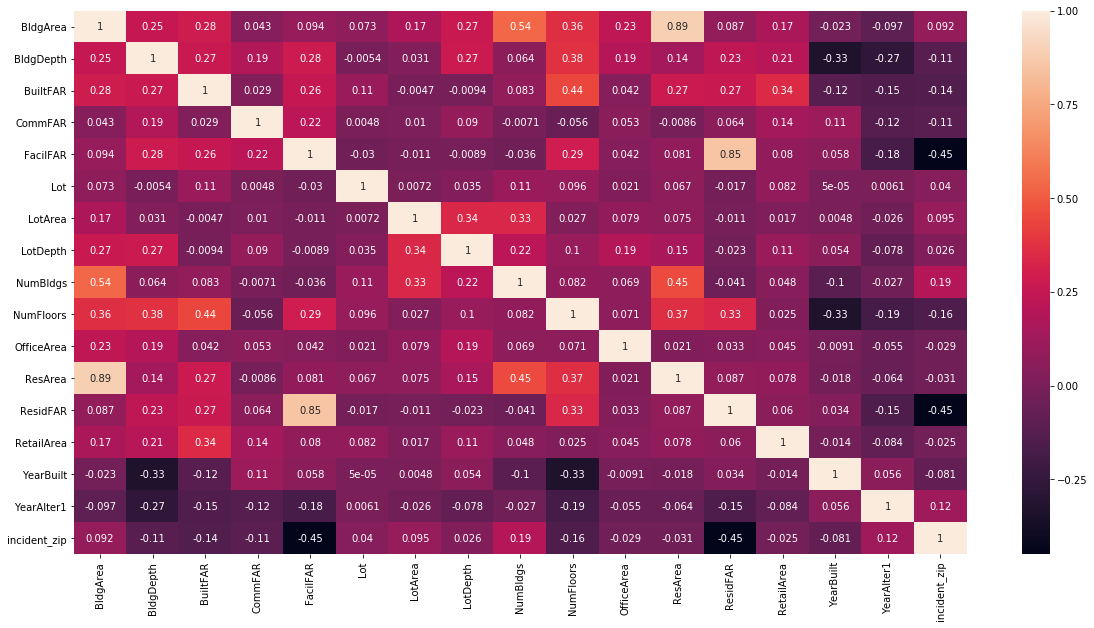

In [50]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(),annot=True)

In [51]:
#df2.to_csv('q3pt1.csv',index=False)

## Modify the NY311 dataset

In [52]:
body = client_****.get_object(Bucket='********',Key='*******')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)


In [53]:
df.shape

(533283, 15)

In [54]:
df.head()

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
0,ADDRESS,BRONX,BRONX,11/6/2015 11:40:01 AM,HEAT/HOT WATER,11/6/2015 7:06:37 AM,1505 TOWNSEND AVENUE,10452.0,40.842340,RESIDENTIAL BUILDING,-73.915038,The Department of Housing Preservation and Dev...,Closed,TOWNSEND AVENUE,31930038
1,ADDRESS,BRONX,BRONX,11/7/2015 1:08:51 AM,HEAT/HOT WATER,11/6/2015 6:43:48 AM,1390 PROSPECT AVENUE,10459.0,40.831536,RESIDENTIAL BUILDING,-73.896778,The Department of Housing Preservation and Dev...,Closed,PROSPECT AVENUE,31930075
2,ADDRESS,BRONX,BRONX,11/9/2015 5:24:18 PM,HEAT/HOT WATER,11/7/2015 8:23:56 PM,2995 BOTANICAL SQUARE,10458.0,40.867716,RESIDENTIAL BUILDING,-73.881612,The Department of Housing Preservation and Dev...,Closed,BOTANICAL SQUARE,31930602
3,ADDRESS,BRONX,BRONX,11/8/2015 12:52:50 PM,HEAT/HOT WATER,11/7/2015 4:26:04 PM,2351 GRAND CONCOURSE,10468.0,40.858889,RESIDENTIAL BUILDING,-73.899100,The complaint you filed is a duplicate of a co...,Closed,GRAND CONCOURSE,31930609
4,ADDRESS,BRONX,BRONX,11/11/2015 1:11:15 AM,HEAT/HOT WATER,11/7/2015 7:55:25 AM,750 GRAND CONCOURSE,10451.0,40.823104,RESIDENTIAL BUILDING,-73.924572,The Department of Housing Preservation and Dev...,Closed,GRAND CONCOURSE,31930628


In [55]:
#Drop away the unneccesary features
df.drop(['address_type', 'borough','city','closed_date','complaint_type','created_date','incident_address',
         'latitude','location_type','longitude','resolution_description','status','street_name', 'unique_key'], axis=1, inplace=True)

In [56]:
df.head()

,incident_zip
0,10452.0
1,10459.0
2,10458.0
3,10468.0
4,10451.0


In [57]:
df.shape

(533283, 1)

In [58]:
#df.to_csv('q3pt2.csv',index=False)

In [59]:
df3 = pd.merge(df2,df,how='left',on='incident_zip')

In [60]:
#df3.to_csv('q3.csv')

## Data Exploration and Feature Selection for combined file

In [61]:
body = client_*********.get_object(Bucket='*******',Key='********')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df3 = pd.read_csv(body)



In [62]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 17 columns):
BldgArea        86590 non-null int64
BldgDepth       86590 non-null float64
BuiltFAR        86590 non-null float64
CommFAR         86590 non-null float64
FacilFAR        86590 non-null float64
Lot             86590 non-null int64
LotArea         86590 non-null int64
LotDepth        86590 non-null float64
NumBldgs        86590 non-null int64
NumFloors       86590 non-null float64
OfficeArea      86590 non-null int64
ResArea         86590 non-null int64
ResidFAR        86590 non-null float64
RetailArea      86590 non-null int64
YearBuilt       86590 non-null int64
YearAlter1      86590 non-null int64
incident_zip    86590 non-null int64
dtypes: float64(7), int64(10)
memory usage: 11.2 MB


In [63]:
df3.head()

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,incident_zip
0,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,2019,2019,10454
1,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,88,25,10454
2,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,88,2019,10454
3,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,88,18,10454
4,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,99,10,10454


In [64]:
#This is the number of heat/hot water row counts per Zipcode
df3['incident_zip'].value_counts()

10469    11078
10466     8965
10465     7853
10461     7324
10473     4719
10467     4577
10462     4513
10472     4266
10457     2956
10460     2805
10456     2802
10458     2721
10459     2558
10470     2269
10463     2140
10471     2135
10453     2041
10455     1754
10454     1649
10468     1580
10452     1478
10464     1403
10474     1153
10451     1128
10475      723
Name: incident_zip, dtype: int64

In [65]:
df3.shape

(86590, 17)

In [66]:
df3['Count'] = df3.groupby('incident_zip')['incident_zip'].transform('count') #Create a new Count column

In [67]:
df3.head()

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,incident_zip,Count
0,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,2019,2019,10454,1649
1,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,88,25,10454,1649
2,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,88,2019,10454,1649
3,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,88,18,10454,1649
4,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,99,10,10454,1649


In [68]:
df3.shape

(86590, 18)

In [69]:
#df4 = df3

In [70]:
#Save for Question 4
#df4.to_csv('q4.csv', index=False)

### Use Pearson correlation

In [71]:
sns.set_style("whitegrid")

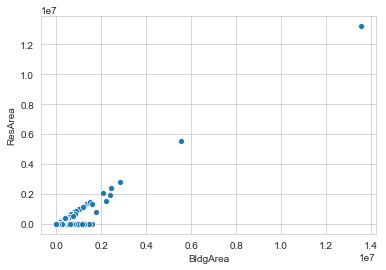

In [72]:
sns.scatterplot(x=df3.BldgArea,y=df3.ResArea) #Linear correlation for both variables

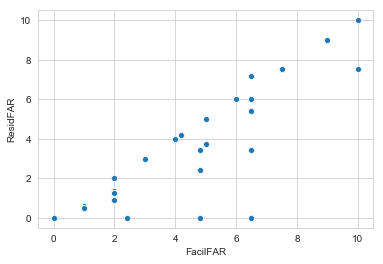

In [73]:
sns.scatterplot(x=df3.FacilFAR,y=df3.ResidFAR) #Linear correlation for both variables

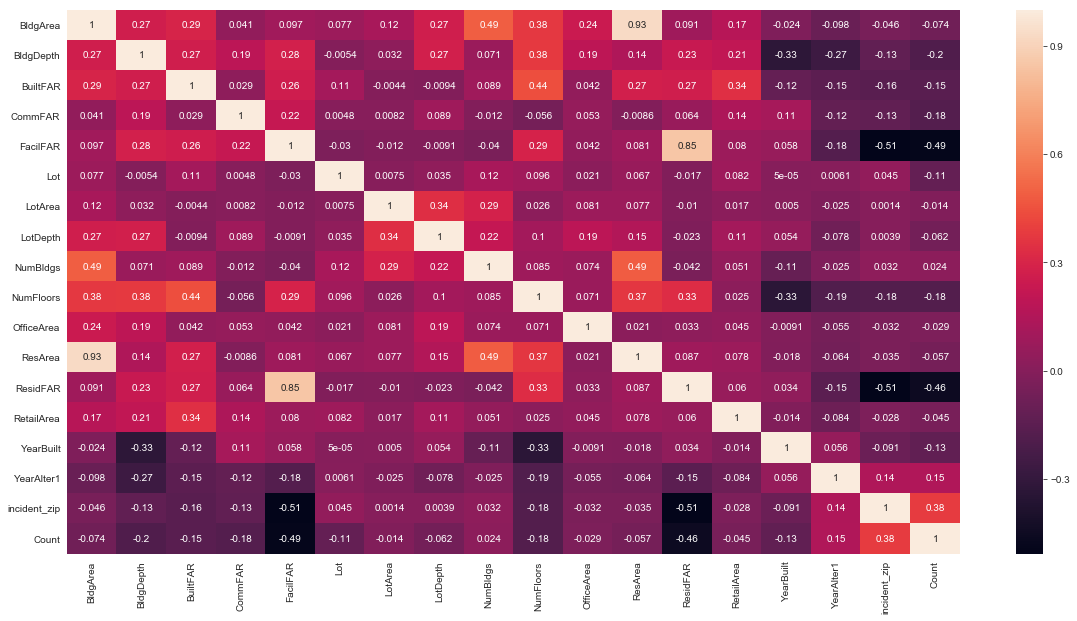

In [74]:
plt.figure(figsize=(20,10))
sns.heatmap(df3.corr(),annot=True)

### Note: Count has correlations with: FacilFAR, ResidFAR and Incident Zip.

## Insights on relationships between Heat/Hot Water complaints with Building characteristics

Text(0.5, 1.0, 'Building Area relationship with Heat/Hot Water cases')

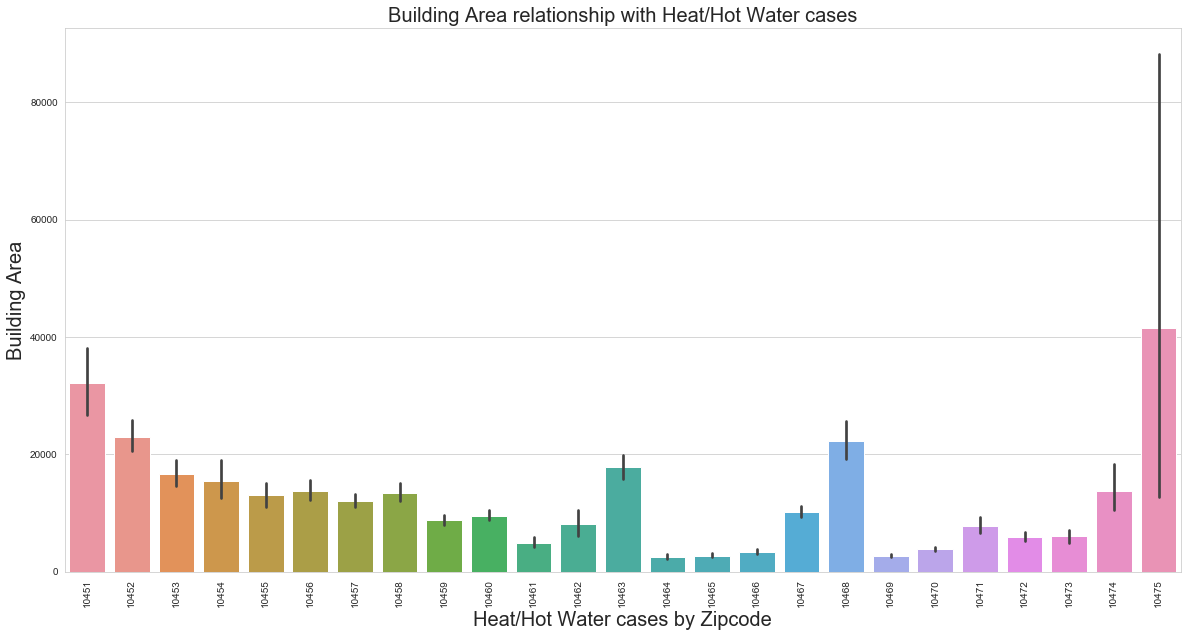

In [76]:
plt.figure(figsize=(20,10))
sns.barplot(x=df3.incident_zip,y=df3.BldgArea)
plt.xticks(rotation=90)
plt.xlabel("Heat/Hot Water cases by Zipcode", size=20)
plt.ylabel("Building Area", size=20)
plt.title("Building Area relationship with Heat/Hot Water cases",size=20)

Text(0.5, 1.0, 'Lot Area relationship with Heat/Hot Water cases')

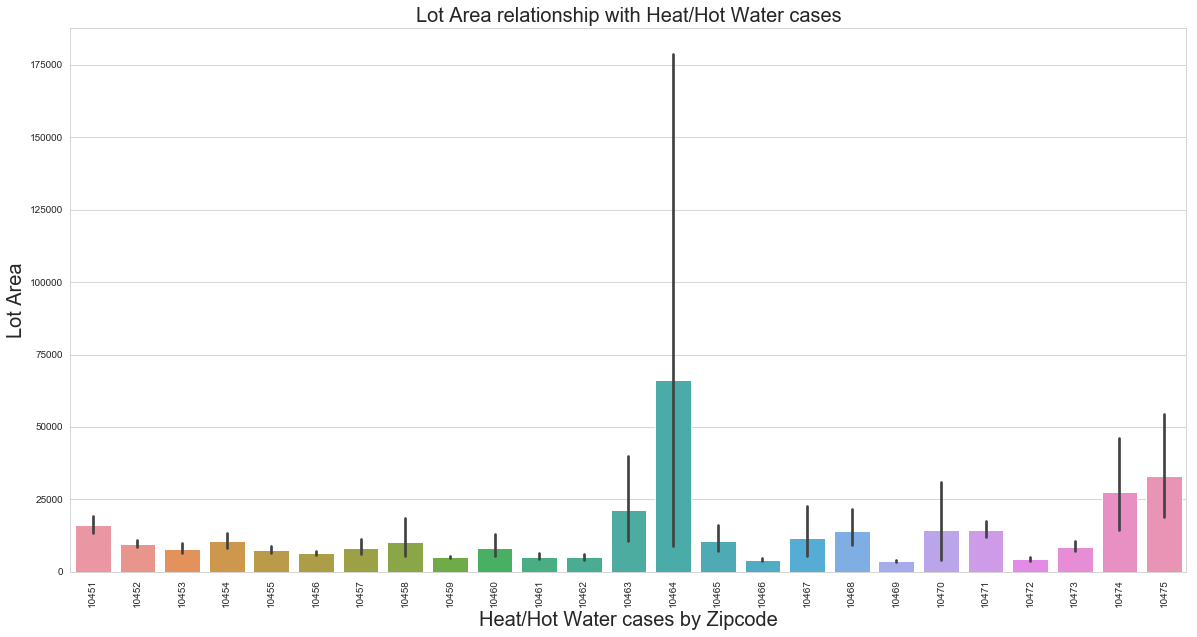

In [77]:
plt.figure(figsize=(20,10))
sns.barplot(x=df3.incident_zip,y=df3.LotArea)
plt.xticks(rotation=90)
plt.xlabel("Heat/Hot Water cases by Zipcode", size=20)
plt.ylabel("Lot Area", size=20)
plt.title("Lot Area relationship with Heat/Hot Water cases",size=20)

Text(0.5, 1.0, 'Number of Years relationship with Heat/Hot Water cases')

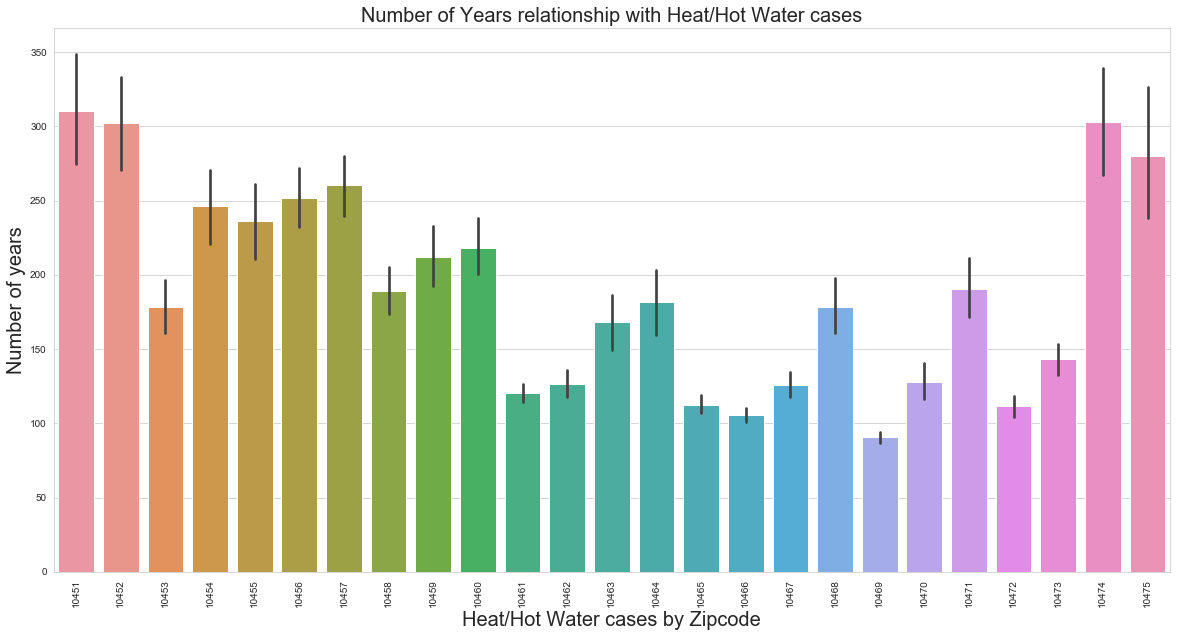

In [78]:
plt.figure(figsize=(20,10))
sns.barplot(x=df3.incident_zip,y=df3.YearBuilt)
plt.xticks(rotation=90)
plt.xlabel("Heat/Hot Water cases by Zipcode", size=20)
plt.ylabel("Number of years", size=20)
plt.title("Number of Years relationship with Heat/Hot Water cases",size=20)

Text(0.5, 1.0, 'Number of Buildings relationship with Heat/Hot Water cases')

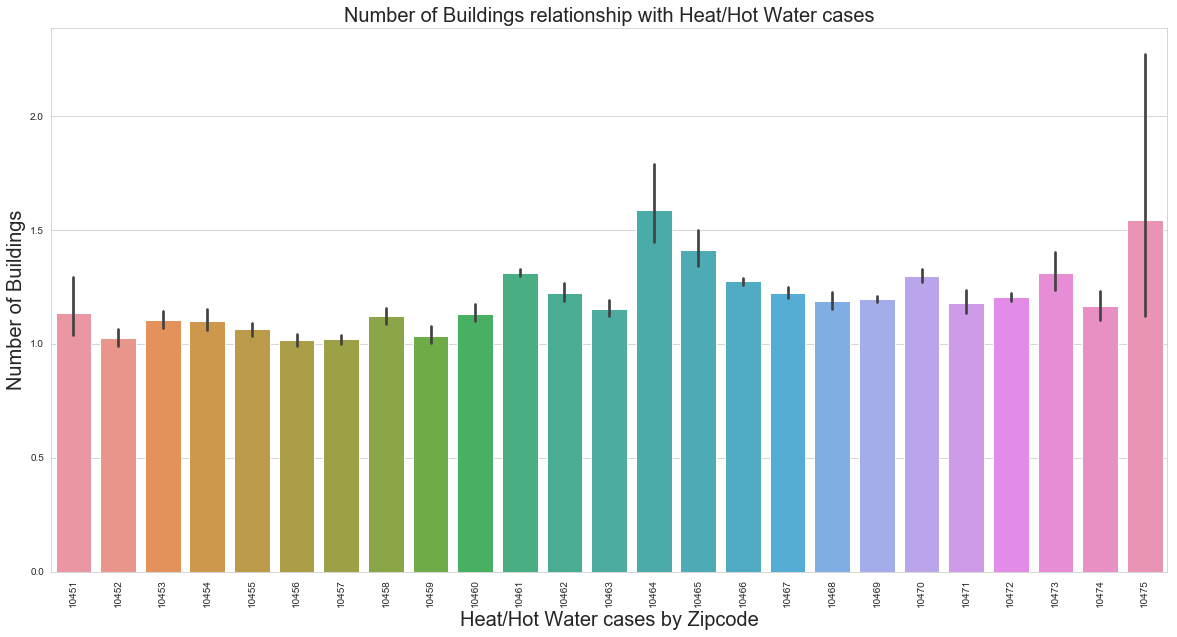

In [79]:
plt.figure(figsize=(20,10))
sns.barplot(x=df3.incident_zip,y=df3.NumBldgs)
plt.xticks(rotation=90)
plt.xlabel("Heat/Hot Water cases by Zipcode", size=20)
plt.ylabel("Number of Buildings", size=20)
plt.title("Number of Buildings relationship with Heat/Hot Water cases",size=20)

Text(0.5, 1.0, 'Number of Floors relationship with Heat/Hot Water cases')

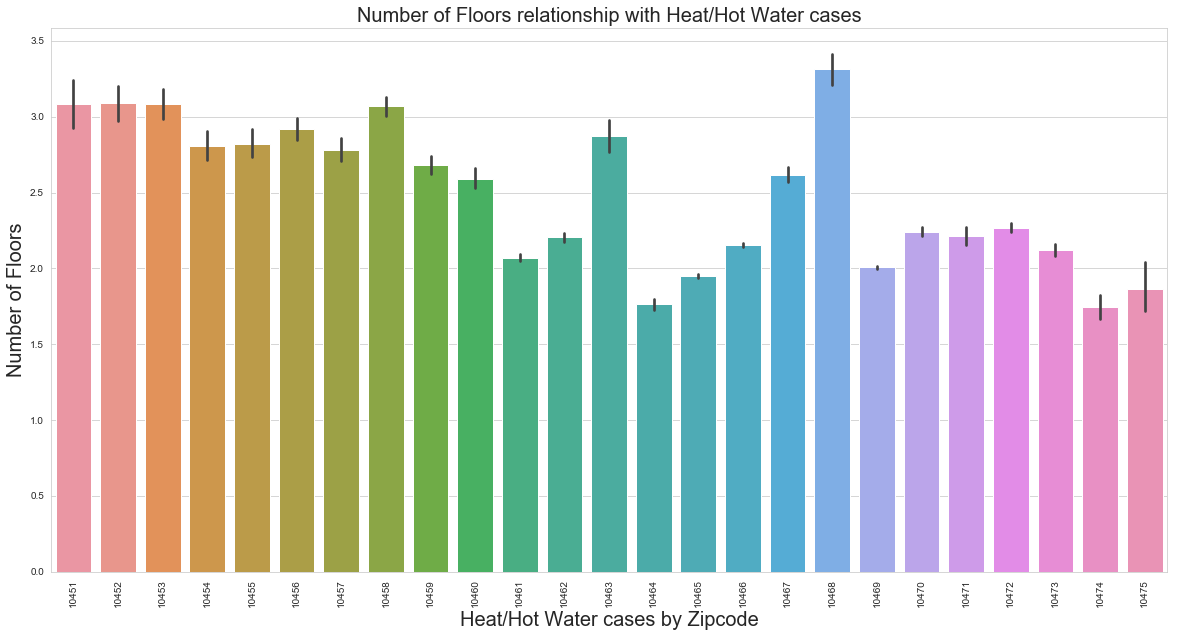

In [80]:
plt.figure(figsize=(20,10))
sns.barplot(x=df3.incident_zip,y=df3.NumFloors)
plt.xticks(rotation=90)
plt.xlabel("Heat/Hot Water cases by Zipcode", size=20)
plt.ylabel("Number of Floors", size=20)
plt.title("Number of Floors relationship with Heat/Hot Water cases",size=20)

# Decide output variable

In [81]:
df3.head()

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,incident_zip,Count
0,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,2019,2019,10454,1649
1,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,88,25,10454,1649
2,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,88,2019,10454,1649
3,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,88,18,10454,1649
4,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,99,10,10454,1649


In [82]:
#Let Count column be target variable
X = df3.drop('Count',axis=1)
y = df3['Count'] #Target variable

In [83]:
X.shape

(86590, 17)

In [84]:
y.shape

(86590,)

## Standardise Variable to Identify Key Feature(s)

In [96]:
df3.head()

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,incident_zip,Count
0,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,2019,2019,10454,1649
1,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,88,25,10454,1649
2,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,88,2019,10454,1649
3,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,88,18,10454,1649
4,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,99,10,10454,1649


In [97]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 18 columns):
BldgArea        86590 non-null int64
BldgDepth       86590 non-null float64
BuiltFAR        86590 non-null float64
CommFAR         86590 non-null float64
FacilFAR        86590 non-null float64
Lot             86590 non-null int64
LotArea         86590 non-null int64
LotDepth        86590 non-null float64
NumBldgs        86590 non-null int64
NumFloors       86590 non-null float64
OfficeArea      86590 non-null int64
ResArea         86590 non-null int64
ResidFAR        86590 non-null float64
RetailArea      86590 non-null int64
YearBuilt       86590 non-null int64
YearAlter1      86590 non-null int64
incident_zip    86590 non-null int64
Count           86590 non-null int64
dtypes: float64(7), int64(11)
memory usage: 11.9 MB


In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
model = LinearRegression()

In [100]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
result = pd.DataFrame(list(zip(model.coef_, df3.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
FacilFAR,550.328182
CommFAR,341.536867
ResidFAR,267.935881
incident_zip,86.379692
NumFloors,80.853274
NumBldgs,28.446459
BldgDepth,9.573782
LotDepth,1.623709
YearBuilt,1.056498


In [102]:
from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import make_pipeline  
scaler = StandardScaler()  
Stand_coef_linear_reg = make_pipeline(scaler, model)

In [103]:
Stand_coef_linear_reg.fit(X,y)
result = pd.DataFrame(list(zip(Stand_coef_linear_reg.steps[1][1].coef_, df3.columns)), 
                      columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
FacilFAR,879.215150
incident_zip,508.461938
Lot,429.205310
YearBuilt,403.640013
ResidFAR,349.584657
BldgDepth,290.322999
CommFAR,191.764598
BldgArea,130.515137
YearAlter1,116.807238


# Random Forest method

In [104]:
X.shape

(86590, 17)

In [105]:
y.shape

(86590,)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [107]:
X_train.shape

(69272, 17)

In [108]:
X_test.shape

(17318, 17)

In [109]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', 
                               random_state=42, n_jobs=-1)

In [110]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [111]:
y_train_pred = forest.predict(X_train)

In [112]:
y_test_pred = forest.predict(X_test)

In [113]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 70.4814, test: 632.4381


In [114]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 1.0000, test: 0.9999


In [115]:
forest.feature_importances_

array([2.84457614e-05, 8.71286612e-05, 3.56223127e-05, 8.25288986e-04,
       3.21329533e-01, 3.20311396e-03, 2.59113727e-04, 7.30092761e-05,
       2.67100873e-05, 1.64458431e-04, 1.00161855e-06, 1.96093747e-05,
       6.54365491e-04, 2.29711814e-05, 3.11425742e-04, 5.13856076e-06,
       6.72953064e-01])

In [116]:
X.columns

Index(['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot',
       'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea',
       'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'incident_zip'],
      dtype='object')

In [117]:
result = pd.DataFrame(forest.feature_importances_, X.columns)
result.columns = ['feature']

In [118]:
result.sort_values(by='feature', ascending=False)

,feature
incident_zip,0.672953
FacilFAR,0.321330
Lot,0.003203
CommFAR,0.000825
ResidFAR,0.000654
YearBuilt,0.000311
LotArea,0.000259
NumFloors,0.000164
BldgDepth,0.000087
LotDepth,0.000073


<Figure size 1440x720 with 0 Axes>

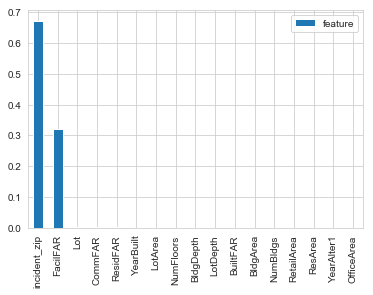

In [119]:
plt.figure(figsize=(20,10))
result.sort_values(by='feature', ascending=False).plot(kind='bar')

Feature importance found are incident_zip and FacilFAR using Random Forest.

# XGBoost method

In [120]:
xgb_reg = XGBRegressor(max_depth=5,n_estimators=1000,n_jobs=-1)

In [121]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [122]:
y_train_pred = xgb_reg.predict(X_train)

In [123]:
y_test_pred = xgb_reg.predict(X_test)

In [124]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 5.2236, test: 59.2027


In [125]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 1.0000, test: 1.0000


<Figure size 1440x720 with 0 Axes>

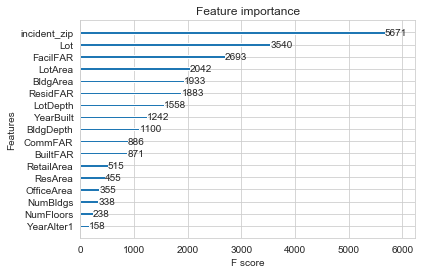

In [126]:
# plot feature importance

plt.figure(figsize=(20,10))
plot_importance(xgb_reg, max_num_features = 20)
plt.show()

## Concluding Remarks - Some of the building characteristics like Incident Zip, FacilFAR, Lot seems to have some relationship with Number of Heating Complaints as verified by Random Forest and XGBoost algorithms.